In [ ]:
!pip install kaggle

In [ ]:
!pip install fastai --upgrade

     |████████████████████████████████| 189 kB 9.2 MB/s 
     |████████████████████████████████| 56 kB 5.7 MB/s 
  Attempting uninstall: fastai
    Found existing installation: fastai 1.0.61
    Uninstalling fastai-1.0.61:
      Successfully uninstalled fastai-1.0.61


In [ ]:
!pip install pydicom

     |████████████████████████████████| 2.0 MB 9.0 MB/s 


In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"jaycaceres1","key":"5d6c7bcb216a35f437729c82cbed0d85"}'}

In [ ]:
from kaggle.api.kaggle_api_extended import KaggleApi

In [ ]:
rm -r ~/.kaggle

In [ ]:
mkdir ~/.kaggle

In [ ]:
cp kaggle.json ~/.kaggle

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list 

ref                                                         title                                              size  lastUpdated          downloadCount  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              237KB  2021-11-10 18:11:20          15356  
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-04-28 17:03:01           9340  
imsparsh/musicnet-dataset                                   MusicNet Dataset                                   22GB  2021-02-18 14:12:19           4174  
dhruvildave/wikibooks-dataset                               Wikibooks Dataset                                   2GB  2021-10-22 10:48:21           3417  
promptcloud/careerbuilder-job-listing-2020                  Careerbuilder Jo

In [ ]:
!kaggle datasets download -d jhoward/rsna-hemorrhage-jpg --force

100% 3.80G/3.82G [00:36<00:00, 180MB/s]
100% 3.82G/3.82G [00:37<00:00, 111MB/s]


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from zipfile import ZipFile

In [ ]:
!unzip rsna-hemorrhage-jpg.zip

Streaming output truncated to the last 5000 lines.
  inflating: train_jpg/train_jpg/ID_f95a5acf1.jpg  
  inflating: train_jpg/train_jpg/ID_f95aab9b9.jpg  
  inflating: train_jpg/train_jpg/ID_f95aead46.jpg  
  inflating: train_jpg/train_jpg/ID_f95b1b2f3.jpg  
  inflating: train_jpg/train_jpg/ID_f95b84d72.jpg  
  inflating: train_jpg/train_jpg/ID_f95b92b87.jpg  
  inflating: train_jpg/train_jpg/ID_f95c5c81c.jpg  
  inflating: train_jpg/train_jpg/ID_f95c6f8dc.jpg  
  inflating: train_jpg/train_jpg/ID_f95c753dd.jpg  
  inflating: train_jpg/train_jpg/ID_f95c760db.jpg  
  inflating: train_jpg/train_jpg/ID_f95ce62ee.jpg  
  inflating: train_jpg/train_jpg/ID_f95d00a82.jpg  
  inflating: train_jpg/train_jpg/ID_f95d1d45b.jpg  
  inflating: train_jpg/train_jpg/ID_f95d4cfcf.jpg  
  inflating: train_jpg/train_jpg/ID_f95d6fed6.jpg  
  inflating: train_jpg/train_jpg/ID_f95dab24a.jpg  
  inflating: train_jpg/train_jpg/ID_f95e2044e.jpg  
  inflating: train_jpg/train_jpg/ID_f95e79cff.jpg  
  inflating: 

In [ ]:
from fastai import *
from fastai.vision.all import *
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
import pydicom
import glob
import pandas as pd

In [ ]:
trn_path = Path('train_jpg/train_jpg/')
csv_path = Path('meta/meta/')

In [ ]:
labels = pd.read_csv(csv_path / 'labels.csv')
labels.head()

,ID,any,epidural,intraparenchymal,intraventricular,subarachnoid,subdural
0,ID_00008ce3c.jpg,0,0,0,0,0,0
1,ID_0000aee4b.jpg,0,0,0,0,0,0
2,ID_0002003a8.jpg,0,0,0,0,0,0
3,ID_0002081b6.jpg,1,0,1,0,0,0
4,ID_00027cbb1.jpg,0,0,0,0,0,0


In [ ]:
fn = get_image_files(trn_path)
print(len(fn))

194082


In [ ]:
dls = ImageDataLoaders.from_df(labels, trn_path, bs = 256, seed = 42)

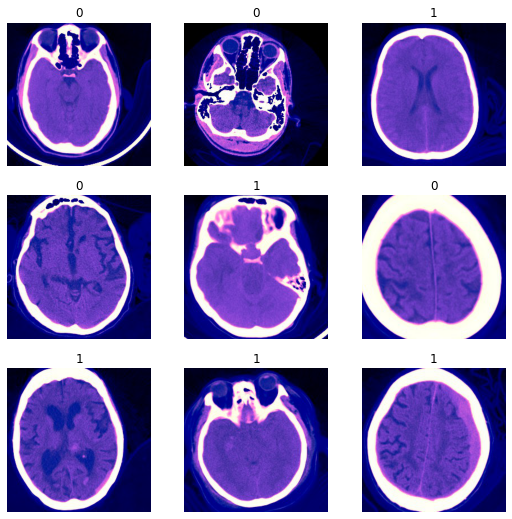

In [ ]:
len(dls.train_ds), len(dls.valid_ds)
dls.show_batch()

In [ ]:
learn = cnn_learner(dls, resnet18, pretrained=False, metrics=[error_rate, accuracy], model_dir='/kaggle')

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


In [ ]:
learn.fit_one_cycle(5, lr_max = 3e-3)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.396377,1.464534,0.492761,0.507239,09:32
1,0.331924,0.449059,0.212670,0.787330,08:56
2,0.279788,0.324829,0.144245,0.855755,08:20
3,0.242701,0.247064,0.101401,0.898598,08:07
4,0.209346,0.232006,0.093261,0.906739,08:09


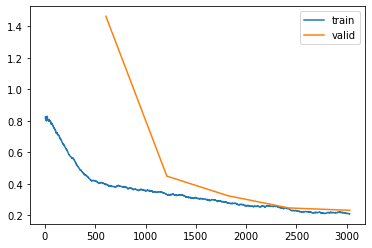

In [ ]:
learn.recorder.plot_loss()